In [1]:
import uuid

import cv2
import numpy as np
from PIL import Image
from pyzbar import pyzbar

from matplotlib import pyplot as plt

In [25]:
def extract_data(image_ndarray):
    barcodes = pyzbar.decode(image_ndarray)

    codes_info = []

    for barcode in barcodes:
        type = barcode.type
        info = barcode.data.decode("utf-8")
        rect = barcode.rect
        x, y, w, h = rect
        bounded_img = image_ndarray[y : y + h, x : x + w]
        codes_info.append({"type": type, "info": info, "rect": barcode.rect, "bounded_img": bounded_img})
    return codes_info

Type: QRCODE Data: 00020101021226850014br.gov.bcb.pix2563pix.santander.com.br/qr/v2/6a7f3ec7-7be1-4958-adcf-1e8379926cd052040000530398654041.005802BR5917TELEFONICA BRASIL6009SAO PAULO62070503***630442A8


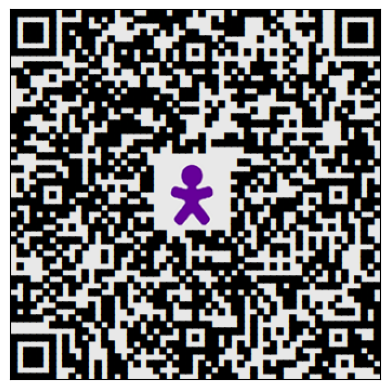

Type: I25 Data: 84600000001460900801000134218672892401043436


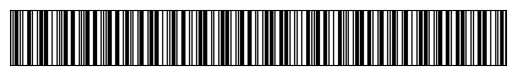

In [29]:
img = Image.open("../examples/image1.png")
image_ndarray = np.asarray(img)
codes_info = extract_data(image_ndarray)

for code in codes_info:
    print(f"Type: {code['type']} Data: {code['info']}")
    plt.imshow(code['bounded_img'])
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    

 